# Low-noise versions of `dynamic-2.ipynb`

_23 August 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

This is an effort to investigate why the digital schemes in `dynamic-2.ipynb` don't converge as expected.

In [1]:
import matplotlib.pyplot as plt
from plotting import plot_averaged_training_charts, plot_comparison, make_axes, show_timestamp_info

In [2]:
common_specs = {
    'rounds':                 ('expect', 150),
    'batch_size':             ('expect', 64),
    'epochs':                 ('expect', 1),
    'ema_coefficient':        ('expect', 1 / 3),
    'save_squared_error':     ('expect', False),
    'send':                   ('expect', 'deltas'),
    'optimizer_client':       ('expect', 'sgd'),
    'clients':                ('title',  20),
    'lr_scheduler_client':    ('expect', 'none'),
}
base_analog_specs = common_specs.copy()
base_analog_specs.update({
    'script': 'dynpower.py',
    'power':                  ('title',  1.0),
    'power_update_period':    ('expect', 1),
    'power_quantile':         ('expect', 0.9),
    'power_factor':           ('expect', 0.9),
    'noise':                  ('series', 1e-6),
})
base_digital_specs = common_specs.copy()
base_digital_specs.update({
    'script': 'dynquant.py',
    'power':                  ('title',  1.0),
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('series', '__all__'),
    'qrange_client_quantile': ('series', '__all__'),
    'channel_uses':           ('expect', None),
    'rounding_method':        ('expect', 'stochastic'),
    'parameter_schedule':     ('expect', 'staggered'),
    'zero_bits_strategy':     ('expect', 'read-zero'),
    'noise':                  ('series', '__all__'),
})
base_dynrange_specs = common_specs.copy()
base_dynrange_specs.update({
    'script': 'dynrange.py',
    'qrange_update_period':   ('expect', 1),
    'qrange_param_quantile':  ('series', '__all__'),
    'qrange_client_quantile': ('series', '__all__'),
})

def add_specs_to_base(specs):
    """Updates each of the three base specs with `specs`, and returns a 3-tuple."""
    analog_specs = base_analog_specs.copy()
    digital_specs = base_digital_specs.copy()
    dynrange_specs = base_dynrange_specs.copy()
    analog_specs.update(specs)
    digital_specs.update(specs)
    dynrange_specs.update(specs)
    return analog_specs, digital_specs, dynrange_specs

unconstrained_kwargs = {'linestyle': 'dotted', 'label': 'unconstrained', 'linewidth': 3}

# epsilon

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:51:06** | 23 Aug 2021, 09:56:17 | 5 min 11 s |
| last to finish | 24 Aug 2021, 05:29:15 | **24 Aug 2021, 05:34:36** | 5 min 21 s |
| shortest | 23 Aug 2021, 12:23:18 | 23 Aug 2021, 12:28:17 | **4 min 59 s** |
| longest | 24 Aug 2021, 04:12:43 | 24 Aug 2021, 04:27:59 | **15 min 16 s** |


- Skipping 13 runs using 1 other scripts: dynrange.py (13)
- Skipping 53 runs that don't match on 2 keys: clients (35), noise (35)
- Skipping 13 runs using 1 other scripts: dynrange.py (13)
- Skipping 61 runs that don't match on 2 keys: noise (42), clients (40)
- Skipping 161 runs using 2 other scripts: dynquant.py (90), dynpower.py (71)
- Skipping 4 runs that don't match on 1 keys: clients (4)


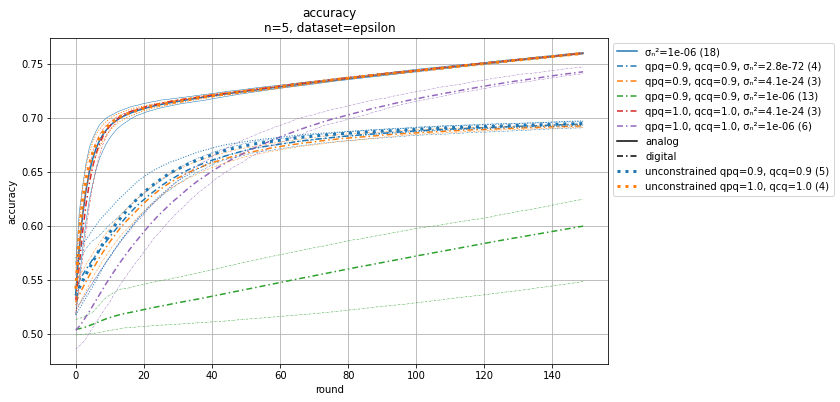

In [3]:
paths = [
    "results/20210823-epsilon-analog",
    "results/20210823-epsilon-digital",
    "results/20210823-epsilon-digital-lonoise-1",
    "results/20210823-epsilon-digital-lonoise-2",
]
epsilon_specs = {
    'dataset':                ('title',  'epsilon'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', 20000),
    'clients':                ('title',  5), 
}
analog_specs, digital_specs, dynrange_specs = add_specs_to_base(epsilon_specs)
digital_specs['noise'] = ('series', [1e-6, 4.1e-24, 2.8e-72])

show_timestamp_info(paths)
axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-success">Changing to <code>qpq=1 qcq=1</code> seems to get it to match analog $\sigma_\mathrm{n}^2 = 10^{-6}$ performance at 8 bits per parameter ($\sigma_\mathrm{n}^2 = 4.1 \times 10^{-24}$).</div>

- Skipping 13 runs using 1 other scripts: dynrange.py (13)
- Skipping 53 runs that don't match on 2 keys: clients (36), noise (35)
- Skipping 13 runs using 1 other scripts: dynrange.py (13)
- Skipping 63 runs that don't match on 2 keys: clients (50), noise (36)
- Skipping 161 runs using 2 other scripts: dynquant.py (90), dynpower.py (71)
- Skipping 9 runs that don't match on 1 keys: clients (9)


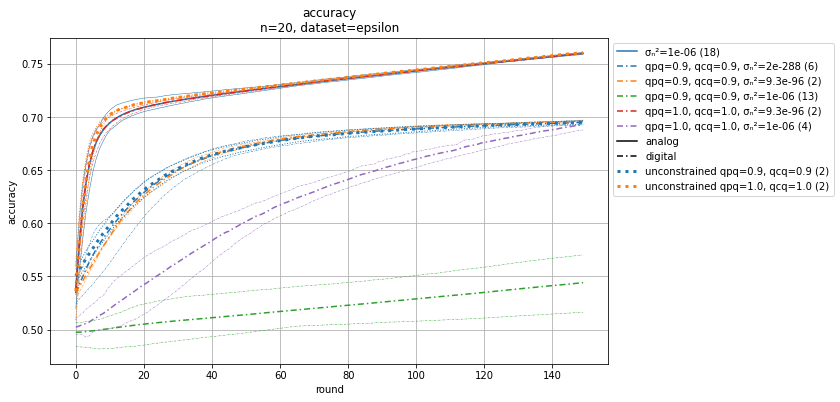

In [4]:
analog_specs['clients'] = ('title', 20)
digital_specs['clients'] = ('title', 20)
dynrange_specs['clients'] = ('title', 20)
digital_specs['noise'] = ('series', [1e-6, 9.3e-96, 2e-288])

axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-success">Changing to <code>qpq=1 qcq=1</code> seems to get it to match analog $\sigma_\mathrm{n}^2 = 10^{-6}$ performance at 8 bits per parameter ($\sigma_\mathrm{n}^2 = 9.3 \times 10^{-96}$).</div>

- Skipping 84 runs using 2 other scripts: dynpower.py (71), dynrange.py (13)
- Skipping 50 runs that don't match on 1 keys: clients (50)
- Skipping 161 runs using 2 other scripts: dynquant.py (90), dynpower.py (71)
- Skipping 9 runs that don't match on 1 keys: clients (9)


(0.0, 0.001)

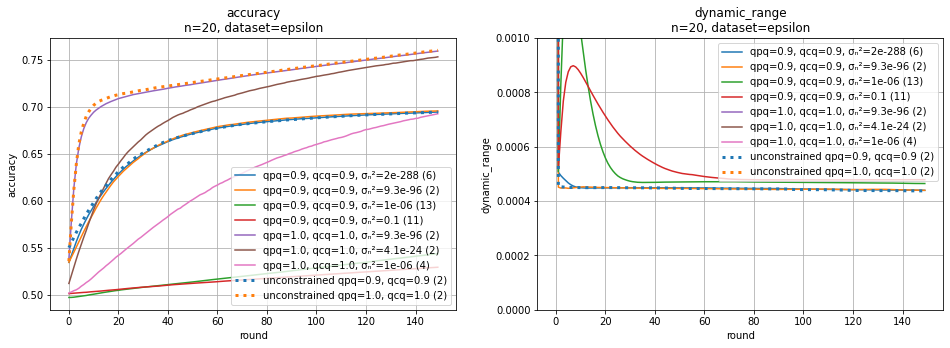

In [5]:
digital_specs['noise'] = ('series', '__all__')
axs = make_axes(2)
plot_averaged_training_charts(paths, ['accuracy', 'quantization_range'], digital_specs, axs=axs)
plot_averaged_training_charts(paths, ['accuracy', 'dynamic_range'], dynrange_specs, axs=axs, **unconstrained_kwargs)
plt.ylim((0, 0.001))

# Fashion-MNIST

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:33:51** | 23 Aug 2021, 09:56:10 | 22 min 18 s |
| last to finish | 24 Aug 2021, 05:12:00 | **24 Aug 2021, 05:31:32** | 19 min 32 s |
| shortest | 23 Aug 2021, 12:04:13 | 23 Aug 2021, 12:20:50 | **16 min 36 s** |
| longest | 23 Aug 2021, 19:53:36 | 23 Aug 2021, 20:16:29 | **22 min 52 s** |


- Skipping 9 runs using 1 other scripts: dynrange.py (9)
- Skipping 21 runs that don't match on 1 keys: noise (21)
- Skipping 9 runs using 1 other scripts: dynrange.py (9)
- Skipping 15 runs that don't match on 1 keys: noise (15)
- Skipping 90 runs using 2 other scripts: dynquant.py (48), dynpower.py (42)


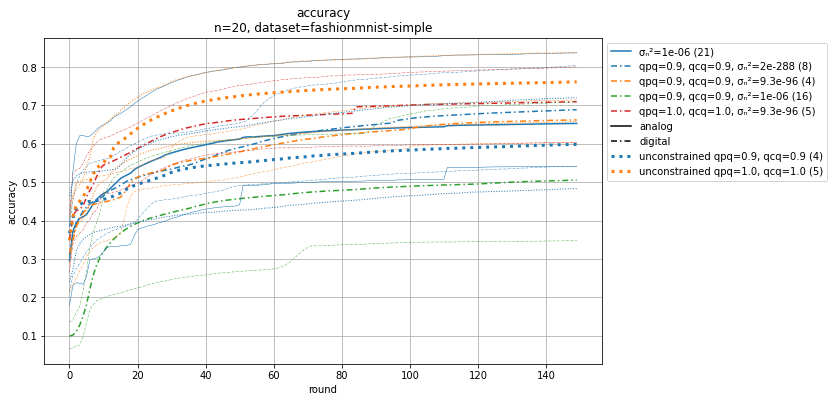

In [6]:
paths = ["results/20210823-fmnist-simple", "results/20210823-fmnist-simple-lonoise"]
fmnist_simple_specs = {
    'dataset':                ('title',  'fashionmnist-simple'),
    'lr_client':              ('expect', 0.01),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs, digital_specs, dynrange_specs = add_specs_to_base(fmnist_simple_specs)
digital_specs['noise'] = ('series', [1e-6, 9.3e-96, 2e-288])

show_timestamp_info(paths)
axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-danger">
    The $\sigma_\mathrm{n}^2 = 10^{-6}$ case seems to underperform. Digital and unconstrained seem fine (with the usual caveats here around variance).
<div>

- Skipping 51 runs using 2 other scripts: dynpower.py (42), dynrange.py (9)
- Skipping 90 runs using 2 other scripts: dynquant.py (48), dynpower.py (42)


(0.0, 0.001)

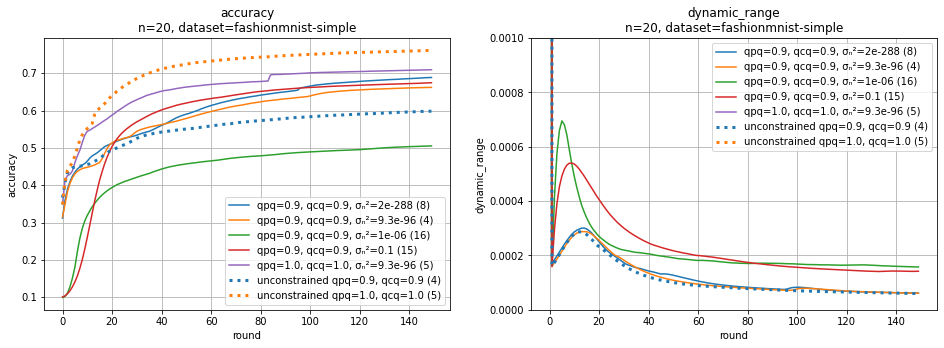

In [7]:
digital_specs['noise'] = ('series', '__all__')
axs = make_axes(2)
plot_averaged_training_charts(paths, ['accuracy', 'quantization_range'], digital_specs, axs=axs)
plot_averaged_training_charts(paths, ['accuracy', 'dynamic_range'], dynrange_specs, axs=axs, **unconstrained_kwargs)
plt.ylim((0, 0.001))

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:17:42** | 23 Aug 2021, 03:00:49 | 43 min 07 s |
| last to finish | 23 Aug 2021, 22:11:34 | **23 Aug 2021, 22:37:58** | 26 min 23 s |
| shortest | 23 Aug 2021, 18:23:24 | 23 Aug 2021, 18:48:00 | **24 min 35 s** |
| longest | 23 Aug 2021, 05:08:56 | 23 Aug 2021, 05:56:27 | **47 min 31 s** |


- Skipping 7 runs using 1 other scripts: dynrange.py (7)
- Skipping 22 runs that don't match on 1 keys: noise (22)
- Skipping 7 runs using 1 other scripts: dynrange.py (7)
- Skipping 20 runs that don't match on 1 keys: noise (20)
- Skipping 98 runs using 2 other scripts: dynquant.py (53), dynpower.py (45)


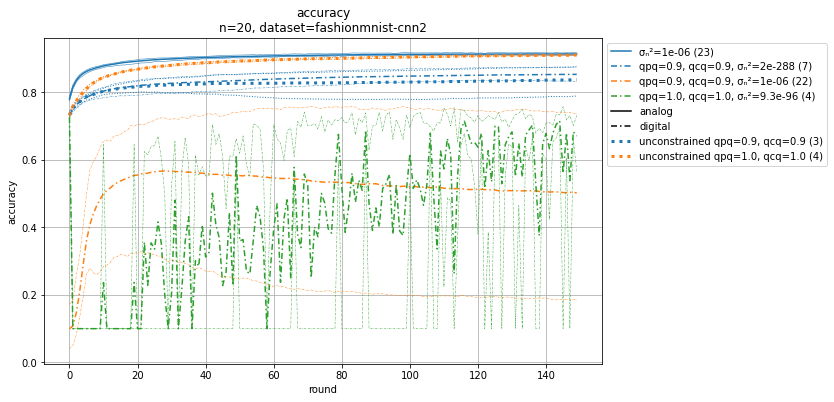

In [8]:
paths = ["results/20210823-fmnist-cnn2", "results/20210823-fmnist-cnn2-lonoise/"]
fmnist_cnn2_specs = {
    'dataset':                ('title',  'fashionmnist-cnn2'),
    'momentum_client':        ('expect', 0.0),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs, digital_specs, dynrange_specs = add_specs_to_base(fmnist_cnn2_specs)
analog_specs['lr_client'] = ('expect', 0.05)
digital_specs['lr_client'] = ('expect', 0.01)
dynrange_specs['lr_client'] = ('expect', 0.01)
digital_specs['noise'] = ('series', [1e-6, 9.3e-96, 2e-288])

show_timestamp_info(paths)
axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-danger">Seems 8 bits per parameter ($\sigma_\mathrm{n}^2 = 9.3 \times 10^{-96}$) isn't enough. Run with 24 bits per parameter, <code>qpq=1 qcq=1 noise=2e-288</code>.</div>

- Skipping 52 runs using 2 other scripts: dynpower.py (45), dynrange.py (7)
- Skipping 98 runs using 2 other scripts: dynquant.py (53), dynpower.py (45)


(0.0, 0.003)

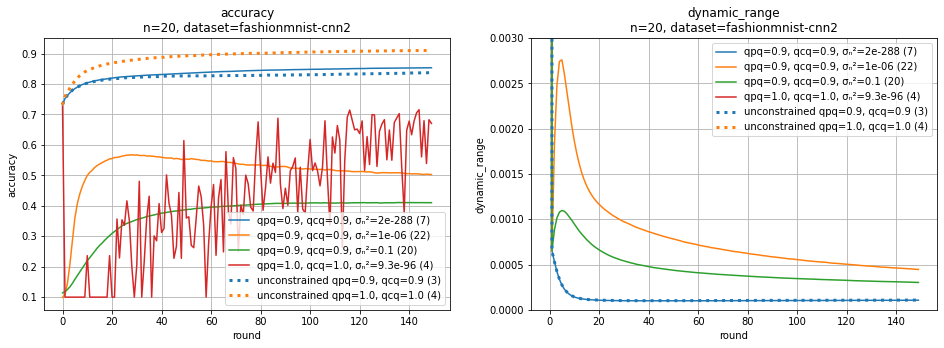

In [9]:
digital_specs['noise'] = ('series', '__all__')
axs = make_axes(2)
plot_averaged_training_charts(paths, ['accuracy', 'quantization_range'], digital_specs, axs=axs)
plot_averaged_training_charts(paths, ['accuracy', 'dynamic_range'], dynrange_specs, axs=axs, **unconstrained_kwargs)
plt.ylim((0, 0.003))

# CIFAR-10

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 09:35:48** | 23 Aug 2021, 10:21:38 | 45 min 50 s |
| last to finish | 24 Aug 2021, 04:46:05 | **24 Aug 2021, 05:31:16** | 45 min 11 s |
| shortest | 24 Aug 2021, 01:10:08 | 24 Aug 2021, 01:49:54 | **39 min 46 s** |
| longest | 24 Aug 2021, 03:58:48 | 24 Aug 2021, 04:46:05 | **47 min 16 s** |


- Skipping 4 runs using 1 other scripts: dynrange.py (4)
- Skipping 7 runs that don't match on 1 keys: noise (7)
- Skipping 4 runs using 1 other scripts: dynrange.py (4)
- Skipping 7 runs that don't match on 1 keys: noise (7)
- Skipping 37 runs using 2 other scripts: dynquant.py (22), dynpower.py (15)


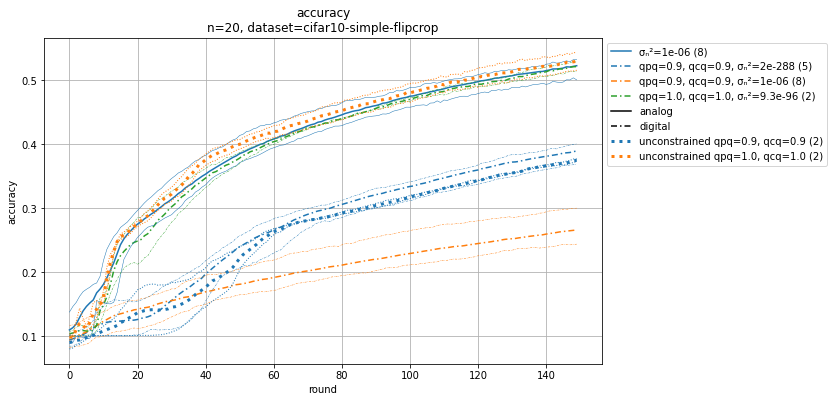

In [10]:
paths = ["results/20210823-cifar10-simple", "results/20210823-cifar10-simple-lonoise/"]
cifar10_simple_specs = {
    'dataset':                ('title',  'cifar10-simple-flipcrop'),
    'lr_client':              ('expect', 0.001),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 0.0),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
}

analog_specs, digital_specs, dynrange_specs = add_specs_to_base(cifar10_simple_specs)
digital_specs['noise'] = ('series', [1e-6, 9.3e-96, 2e-288])

show_timestamp_info(paths)
axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

<div class="alert alert-success">Changing to <code>qpq=1 qcq=1</code> seems to get it to match analog $\sigma_\mathrm{n}^2 = 10^{-6}$ performance at 8 bits ($\sigma_\mathrm{n}^2 = 9.3 \times 10^{-96}$).</div>

- Skipping 19 runs using 2 other scripts: dynpower.py (15), dynrange.py (4)
- Skipping 37 runs using 2 other scripts: dynquant.py (22), dynpower.py (15)


(0.0, 0.015)

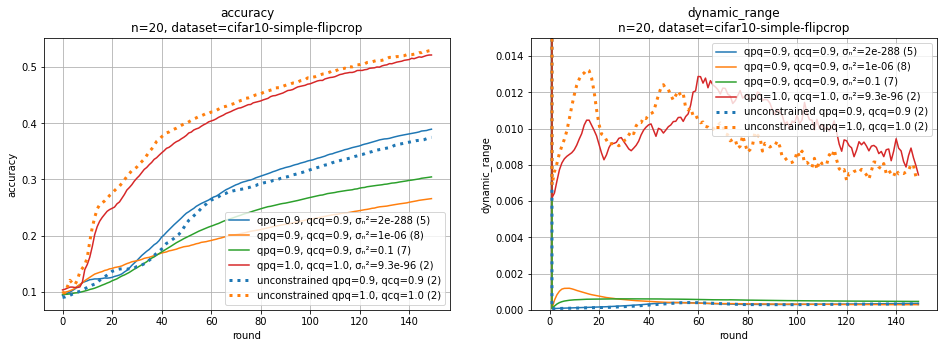

In [11]:
digital_specs['noise'] = ('series', '__all__')
axs = make_axes(2)
plot_averaged_training_charts(paths, ['accuracy', 'quantization_range'], digital_specs, axs=axs)
plot_averaged_training_charts(paths, ['accuracy', 'dynamic_range'], dynrange_specs, axs=axs, **unconstrained_kwargs)
plt.ylim((0, 0.015))

| experiments | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Aug 2021, 02:18:01** | 23 Aug 2021, 03:29:27 | 1 h 11 min 26 s |
| last to finish | 23 Aug 2021, 21:04:42 | **23 Aug 2021, 22:03:10** | 58 min 27 s |
| shortest | 23 Aug 2021, 21:04:42 | 23 Aug 2021, 22:03:10 | **58 min 27 s** |
| longest | 23 Aug 2021, 02:18:01 | 23 Aug 2021, 03:33:12 | **1 h 15 min 11 s** |


- Skipping 2 runs using 1 other scripts: dynrange.py (2)
- Skipping 10 runs that don't match on 1 keys: noise (10)
- Skipping 2 runs using 1 other scripts: dynrange.py (2)
- Skipping 10 runs that don't match on 1 keys: noise (10)
- Skipping 44 runs using 2 other scripts: dynquant.py (24), dynpower.py (20)


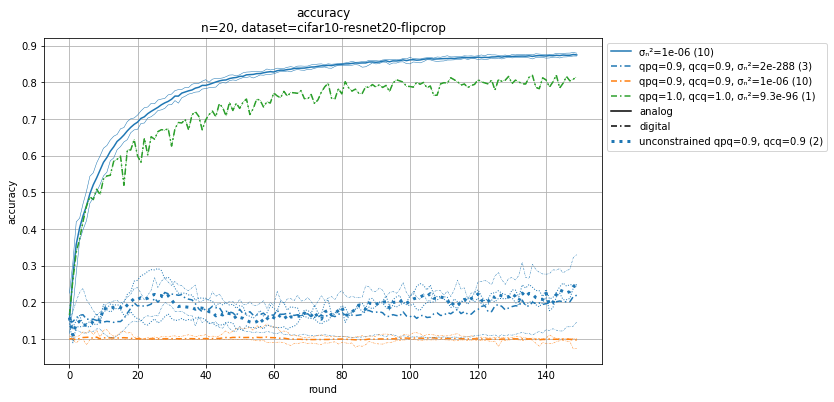

In [12]:
paths = ["results/20210823-cifar10-resnet20", "results/20210823-cifar10-resnet20-lonoise/"]
cifar10_resnet20_specs = {
    'dataset':                ('title',  'cifar10-resnet20-flipcrop'),
    'lr_client':              ('expect', 0.1),
    'momentum_client':        ('expect', 0.9),
    'weight_decay_client':    ('expect', 1e-4),
    'data_per_client':        ('expect', None),
    'clients':                ('title',  20),
    'batch_size':             ('expect', 128),
}

analog_specs, digital_specs, dynrange_specs = add_specs_to_base(cifar10_resnet20_specs)
digital_specs['noise'] = ('series', [1e-6, 9.3e-96, 2e-288])

show_timestamp_info(paths)
axs = make_axes(1, axsize=(10, 6))
plot_comparison('accuracy', paths, analog_specs, digital_specs, both_legends=True, ax=axs[0], extra_lines=['range'])
plot_averaged_training_charts(paths, ['accuracy'], dynrange_specs, axs=axs, **unconstrained_kwargs, extra_lines=['range'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

- Skipping 22 runs using 2 other scripts: dynpower.py (20), dynrange.py (2)
- Skipping 44 runs using 2 other scripts: dynquant.py (24), dynpower.py (20)


(0.0, 0.015)

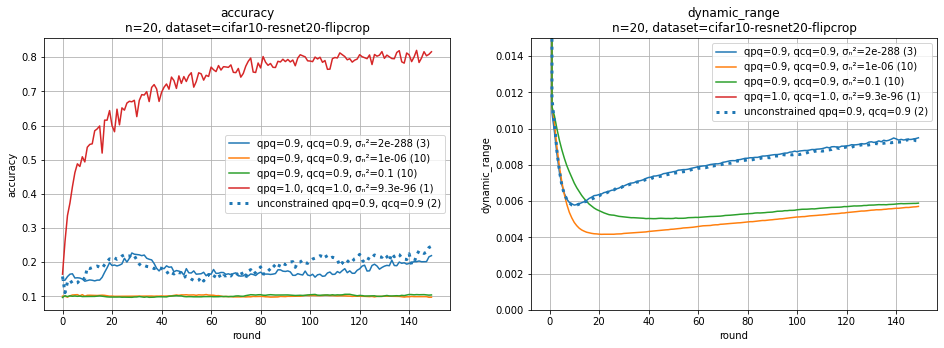

In [13]:
digital_specs['noise'] = ('series', '__all__')
axs = make_axes(2)
plot_averaged_training_charts(paths, ['accuracy', 'quantization_range'], digital_specs, axs=axs)
plot_averaged_training_charts(paths, ['accuracy', 'dynamic_range'], dynrange_specs, axs=axs, **unconstrained_kwargs)
plt.ylim((0, 0.015))